# Relaxzation measurement results
Relax is where we set the bias to 2mA and a sqaure wave. See wg pulse  
Relax2 is the same  
No relax is what also happens with the same setup. Not everytime the pulse is applied, a relaxation occures.  
Relax agian is with a different field line pulse and a positive bias. Mostly same results.  
Seems like it is rarere for the relaxation to ocure.  

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit
import os
from scipy.signal import hilbert

In [76]:
def plot_relax(path, crop, point_jump = 100, stereo = True, max_plot_freq = 300):
    #data = pd.read_csv("../Lab/Grainform/Relax/800nm-relax-1.Wfm.csv").to_numpy()[:,0].astype("single")
    #ch4 = pd.read_csv("../Lab/Grainform/Relax/800nm-relax-1.Wfm.csv").to_numpy()[:,1].astype("single")
    data = pd.read_csv(path).to_numpy()[:,0].astype("single")
        
    plt.figure(figsize=(16/2.54,12/2.54))

    ax1 = plt.subplot(2,1,1)

    dt = (63e-15)
    t = np.linspace(0,len(data)*dt,len(data))
    lns1 = ax1.plot(t[::point_jump]*1e9, data[::point_jump], label = "MTJ")
    ax1.set_ylabel("MTJ AC voltage [V]")
    ax1.set_xlabel("Time [ns]")
    
    if stereo:
        ch4 = pd.read_csv(path).to_numpy()[:,1].astype("single")
        ax11 = ax1.twinx()
        lns2 = ax11.plot(t[::point_jump]*1e9,ch4[::point_jump], color = "tab:orange", label = "Field line voltage")
        ax11.set_ylabel("Field line voltage")

        lns = lns1+lns2
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc=0)

    


    ax2 = plt.subplot(2,2,3)
    cdata = data[crop[0]:crop[1]]
    ct = np.linspace(0,len(cdata)*dt,len(cdata))
    ax2.plot(ct*1e9,cdata)
    ax2.set_xlabel("Time [ns]")
    ax2.set_ylabel("MTJ AC voltage [V]")
    
    fft = rfft(cdata-np.mean(cdata))
    fftfs = rfftfreq(len(cdata), dt)

    ax3 = plt.subplot(2,2,4)
    ax3.plot(fftfs/1e6, np.abs(fft))
    ax3.set_xlim(0,max_plot_freq)
    ax3.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="red", zorder=10, marker="x")
    ax3.annotate(f"{round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), textcoords="offset points", xytext=(40,-10), ha='center')
    ax3.set_xlabel("Frequency [MHz]")
    ax3.set_ylabel("|FFT| [arb. unit]")

    plt.tight_layout()

In [26]:
## plotte indstillinger

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = "../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/relax"
save = False

## Pulse

Pulse used to excite the core applied with an arbitrary waveform generator

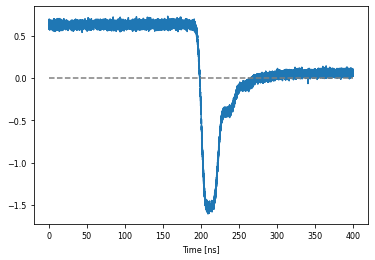

In [20]:
data = pd.read_csv("../Lab/Grainform/Relax/600nm-relax-pulse.Wfm.csv").to_numpy()[:,0].astype("single")
dt = 5e-12
t = np.linspace(0,len(data)*dt,len(data))

plt.plot(t*1e9,data)
plt.xlabel("Time [ns]")
plt.hlines(0,0,400, ls="--", colors="tab:grey")
plt.show()

## 250 nm 1


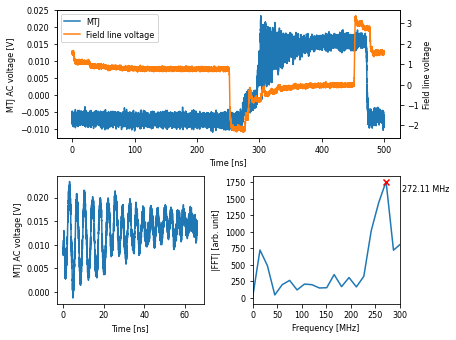

In [21]:
#plt.rcParams.update({"font.size" : 10, "label.size" : 4})

plot_relax("../Lab/Grainform/Relax/250nm-relax1.Wfm.csv", [4_750_000,5_800_000], point_jump=100)
if save: plt.savefig(save_path + "/250nm_1.pdf")

## 250nm 2

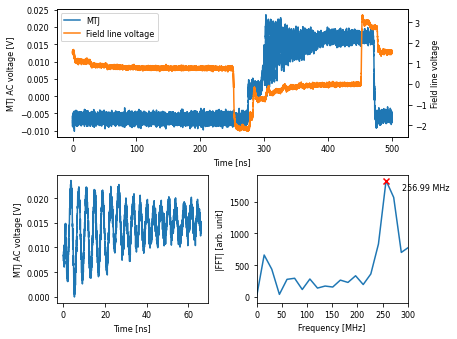

In [22]:
plot_relax("../Lab/Grainform/Relax/250nm-relax2.Wfm.csv", [4_750_000,5_800_000], point_jump=100)
if save: plt.savefig(save_path + "/250nm_2.pdf")

## 250nm no relax

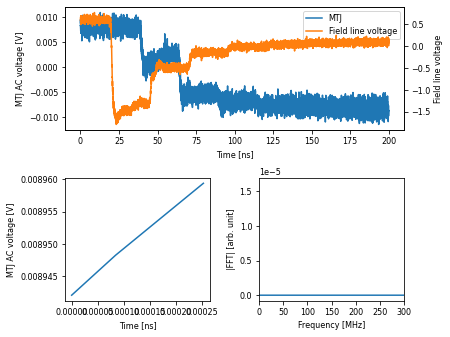

In [23]:
plot_relax("../Lab/Grainform/Relax/250nm-norelax.Wfm.csv", [1,5], point_jump=100)
if save: plt.savefig(save_path + "/250nm_norelax.pdf")

## 300nm 1

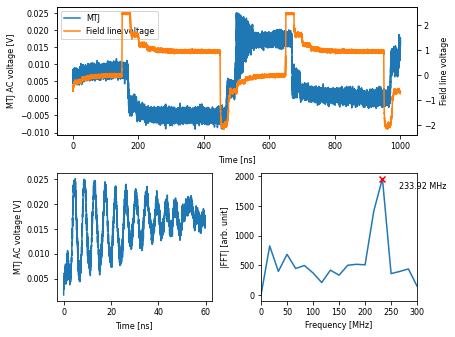

In [24]:
plot_relax("../Lab/Grainform/Relax/300nm-relax1.Wfm.csv", [7_850_000,8_800_000], point_jump=100)
if save: plt.savefig(save_path + "/300nm_1.pdf")

## 300 nm 2

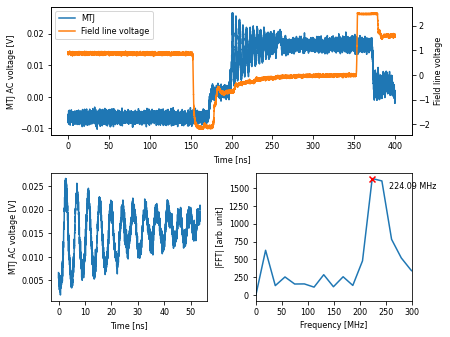

In [25]:
plot_relax("../Lab/Grainform/Relax/300nm-relax2.Wfm.csv", [3_150_000,4_000_000], point_jump=100)
if save: plt.savefig(save_path + "/300nm_2.pdf")

## 350nm 1

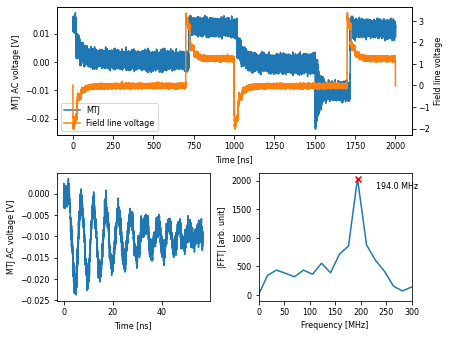

In [26]:
plot_relax("../Lab/Grainform/Relax/350nm-relax1.Wfm.csv", [23_800_000,24_700_000], point_jump=1)
if save: plt.savefig(save_path + "/350nm_1.pdf")

## 350nm 2

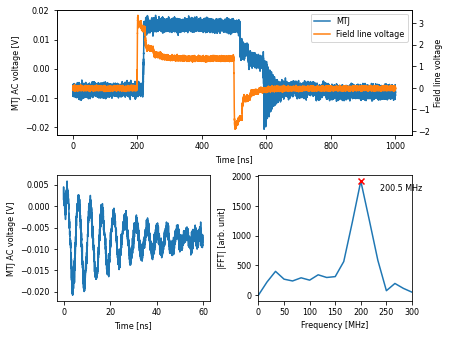

In [27]:
plot_relax("../Lab/Grainform/Relax/350nm-relax2.Wfm.csv", [9_350_000,10_300_000], point_jump=100)
if save: plt.savefig(save_path + "/350nm_2.pdf")

## 600 nm - no Relax

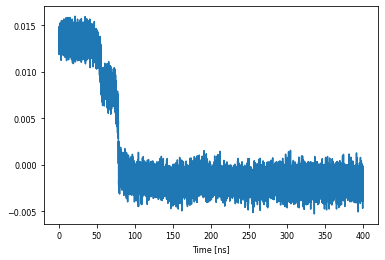

In [28]:
data = pd.read_csv("../Lab/Grainform/Relax/600nm-no-relax.Wfm.csv").to_numpy()[:,0].astype("single")
dt = 63e-15
t = np.linspace(0,len(data)*dt,len(data))

plt.plot(t*1e9,data)
plt.xlabel("Time [ns]")
plt.show()

## 600nm 1

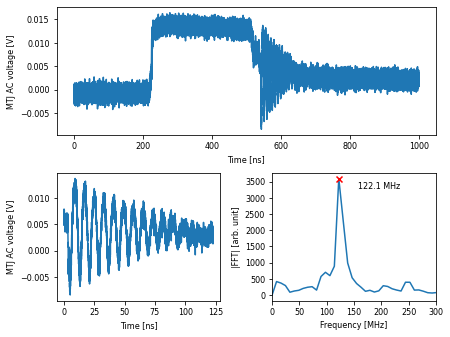

In [29]:
plot_relax("../Lab/Grainform/Relax/600nm-relax.Wfm.csv", [8550000,10500000], point_jump=100, stereo=False)
if save: plt.savefig(save_path + "/600nm_1.pdf")

## 600nm 2 (relax again)

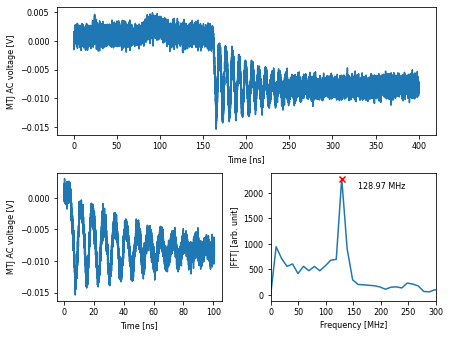

In [30]:
plot_relax("../Lab/Grainform/Relax/600nm-relax-again.Wfm.csv", [2500000,4100000], point_jump=100, stereo=False)
if save: plt.savefig(save_path + "/600nm_2.pdf")

## 600nm relax2

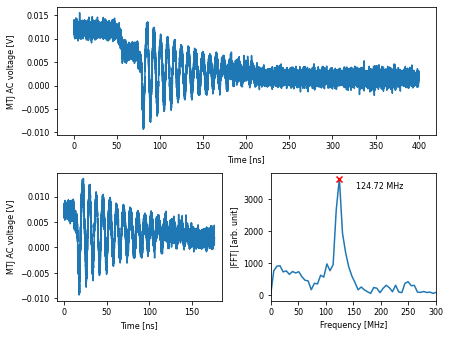

In [31]:
plot_relax("../Lab/Grainform/Relax/600nm-relax2.Wfm.csv", [1000000,3800000], point_jump=100, stereo=False)
if save: plt.savefig(save_path + "/600nm_3.pdf")

## 800nm 1

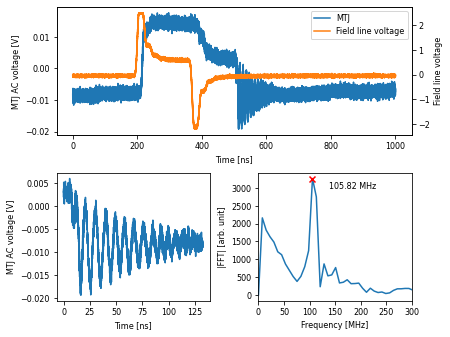

In [32]:
plot_relax("../Lab/Grainform/Relax/800nm-relax-1.Wfm.csv", [7900000,10000000], point_jump=100)
if save: plt.savefig(save_path + "/800nm_1.pdf")

## 800nm 2

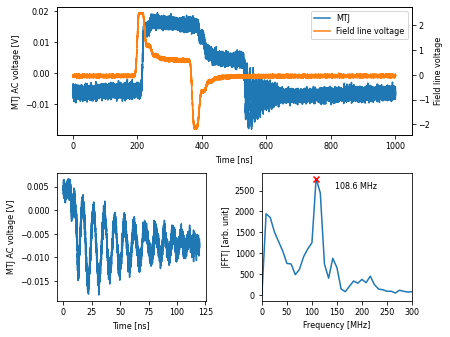

In [33]:
plot_relax("../Lab/Grainform/Relax/800nm-relax-2.Wfm.csv", [8300000,10200000])
if save: plt.savefig(save_path + "/800nm_2.pdf")

## 800nm spontant

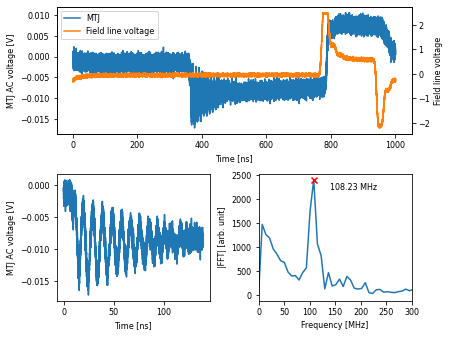

In [34]:
plot_relax("../Lab/Grainform/Relax/800nm-relax-spont.Wfm.csv", [5600000,7800000])
if save: plt.savefig(save_path + "/800nm_spont.pdf")

# Summary

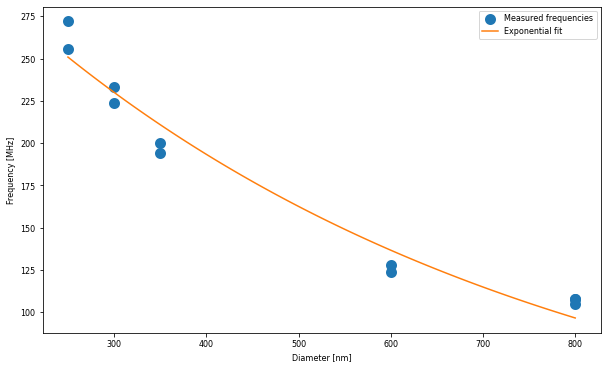

In [35]:
# Data
relax_freq = np.array([272, 256, 233, 224, 194, 200, 124, 128, 108, 108, 105])
dia = np.array([250, 250, 300, 300, 350, 350, 600, 600, 800, 800, 800])

# Define the exponential function
def exponential_model(x, a, b):
    return a * np.exp(-b * x)

# Estimate initial values for parameters
a_guess = relax_freq.max()  # Initial guess for 'a' based on maximum value of 'relax_freq'
b_guess = 1.0 / dia.mean()  # Initial guess for 'b' based on reciprocal of mean value of 'dia'

# Fit the data to the exponential model
params, _ = curve_fit(exponential_model, dia, relax_freq, p0=[a_guess, b_guess])

# Generate a smooth curve using the fitted parameters
y_fit = exponential_model(np.linspace(250,800,100), *params)

# Plot the data and the exponential model
plt.figure(figsize=(10,6))
plt.scatter(dia, relax_freq, linewidths=5, label="Measured frequencies")
plt.plot(np.linspace(250,800,100), y_fit, label="Exponential fit", c="tab:orange")
plt.legend()
plt.xlabel("Diameter [nm]")
plt.ylabel("Frequency [MHz]")
if save: plt.savefig(save_path + "/relax_summary.pdf")
plt.show()


## Spin wars: A new pulse
This is on the same 800nm sample yes

In [38]:
def plot_relax(path, crop, point_jump = 100, stereo = True, max_plot_freq = 300):
    #data = pd.read_csv("../Lab/Grainform/Relax/800nm-relax-1.Wfm.csv").to_numpy()[:,0].astype("single")
    #ch4 = pd.read_csv("../Lab/Grainform/Relax/800nm-relax-1.Wfm.csv").to_numpy()[:,1].astype("single")
    data = pd.read_csv(path).to_numpy()[:,0].astype("single")
        
    plt.figure(figsize=(16/2.54,10/2.54))

    ax1 = plt.subplot(2,1,1)

    dt = (63e-15)
    t = np.linspace(0,len(data)*dt,len(data))
    lns1 = ax1.plot(t[::point_jump]*1e9, data[::point_jump], label = "MTJ")
    ax1.set_ylabel("MTJ AC voltage [V]")
    ax1.set_xlabel("Time [ns]")
    
    if stereo:
        ch4 = pd.read_csv(path).to_numpy()[:,1].astype("single")
        ax11 = ax1.twinx()
        lns2 = ax11.plot(t[::point_jump]*1e9,ch4[::point_jump], color = "tab:orange", label = "Field line voltage")
        ax11.set_ylabel("Field line voltage")

        lns = lns1+lns2
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc=0)
        plt.annotate(f"Field Line Vpp: {round(float((np.max(ch4)-np.min(ch4))),2)} V", (0.2,0.5), xycoords="axes fraction", ha="center", va="center", fontsize=8, color="tab:orange")

    


    ax2 = plt.subplot(2,2,3)
    cdata = data[crop[0]:crop[1]]
    ct = np.linspace(0,len(cdata)*dt,len(cdata))
    ax2.plot(ct*1e9,cdata)
    ax2.set_xlabel("Time [ns]")
    ax2.set_ylabel("MTJ AC voltage [V]")
    
    fft = rfft(cdata-np.mean(cdata))
    fftfs = rfftfreq(len(cdata), dt)

    ax3 = plt.subplot(2,2,4)
    ax3.plot(fftfs/1e6, np.abs(fft))
    ax3.set_xlim(0,max_plot_freq)
    ax3.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="red", zorder=10, marker="x")
    ax3.annotate(f"{round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), textcoords="offset points", xytext=(40,-10), ha='center')
    ax3.set_xlabel("Frequency [MHz]")
    ax3.set_ylabel("|FFT| [arb. unit]")

    plt.tight_layout()

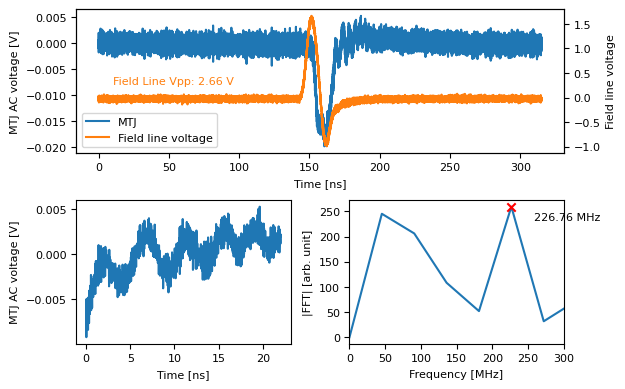

In [40]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1000mvpp.Wfm.csv", [2650000,3000000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1000mvpp.pdf")

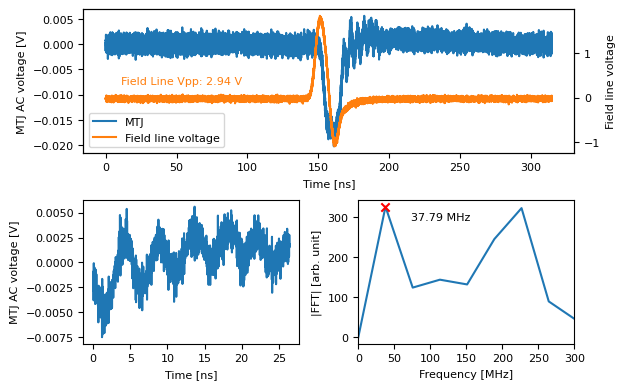

In [42]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1100mvpp.Wfm.csv", [2680000,3100000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1100mvpp.pdf")

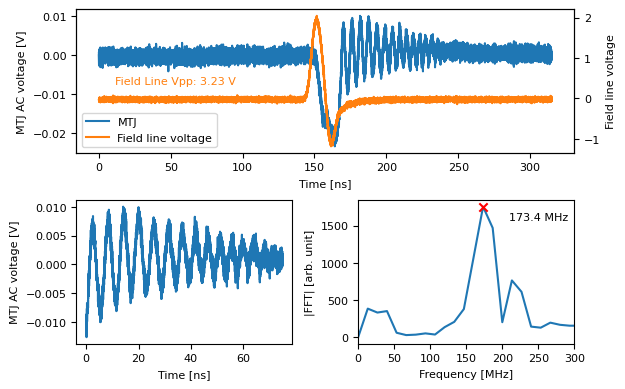

In [43]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1200mvpp.Wfm.csv", [2660000,3850000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1200mvpp.pdf")

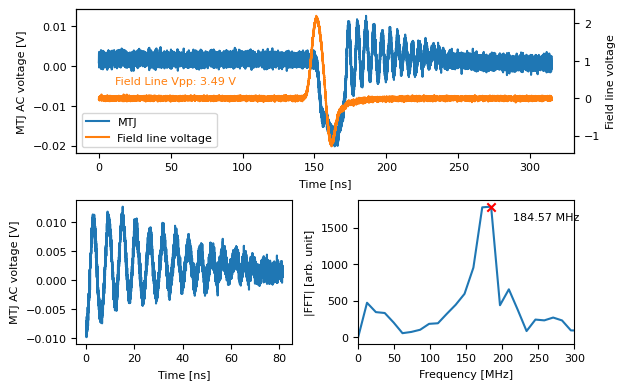

In [44]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1300mvpp_3.Wfm.csv", [2710000,4000000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1300mvpp.pdf")

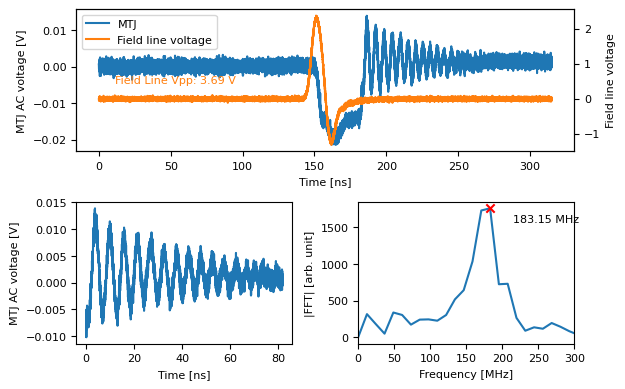

In [45]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1400mvpp_2.Wfm.csv", [2900000,4200000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1400mvpp.pdf")

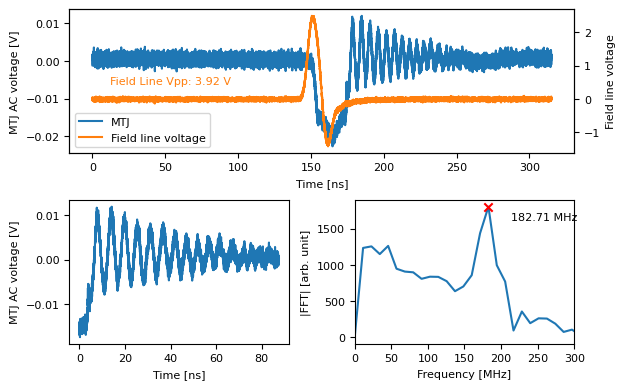

In [46]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1500mvpp_1.Wfm.csv", [2710000,4100000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1500mvpp.pdf")

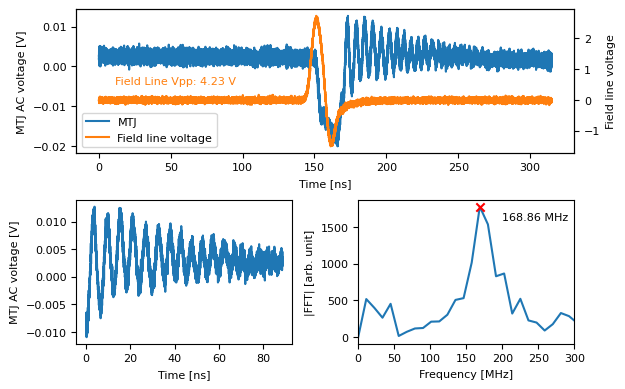

In [47]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1600mvpp_1.Wfm.csv", [2690000,4100000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1600mvpp.pdf")

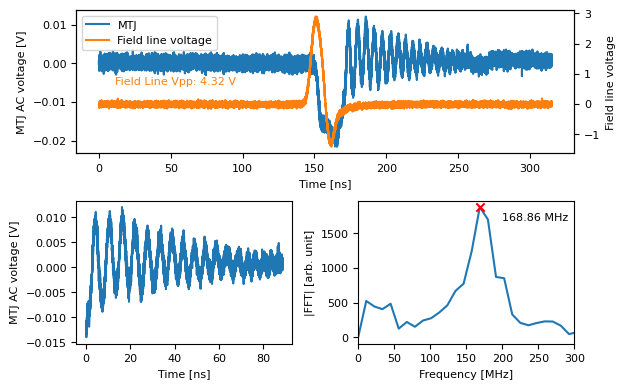

In [48]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1700mvpp_1.Wfm.csv", [2690000,4100000], point_jump=1)
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/1700mvpp.pdf")

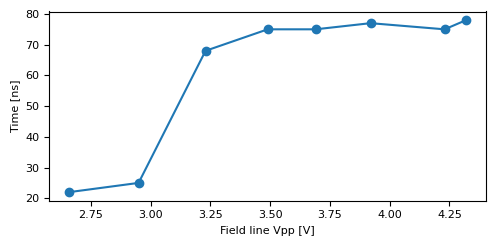

In [55]:
time = [22, 25, 68, 75, 75, 77, 75, 78]
vpp = [2.66, 2.95, 3.23, 3.49, 3.69, 3.92, 4.23, 4.32]

plt.figure(figsize=(5,2.5))
plt.plot(vpp, time, marker="o")
plt.xlabel("Field line Vpp [V]")
plt.ylabel("Time [ns]")
plt.tight_layout()
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/pulsefun/summary.pdf")

## frequency shift in relaxzation

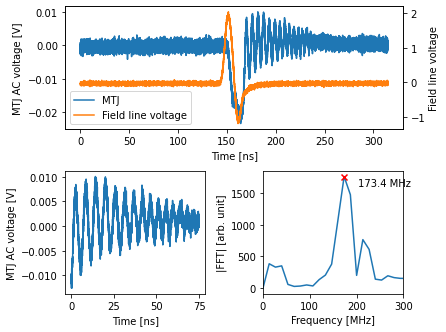

In [23]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1200mvpp.Wfm.csv", [2660000,3850000], point_jump=1)

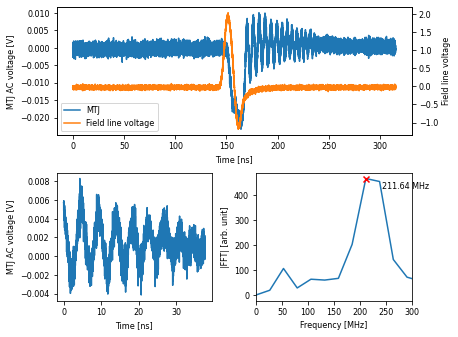

In [33]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1200mvpp.Wfm.csv", [3250000,3850000], point_jump=1)

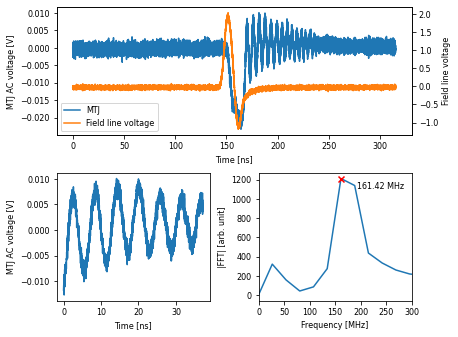

In [34]:
plot_relax("../Lab/Grainform/pulsefun/800nm_1200mvpp.Wfm.csv", [2660000,3250000], point_jump=1)

## relax 2


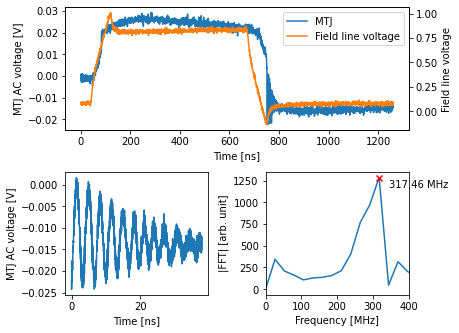

In [78]:
plot_relax("../Lab/Grainform/Relax2/400nm-P5.Wfm.csv", [12000000,12600000], point_jump=10_000, max_plot_freq = 400)

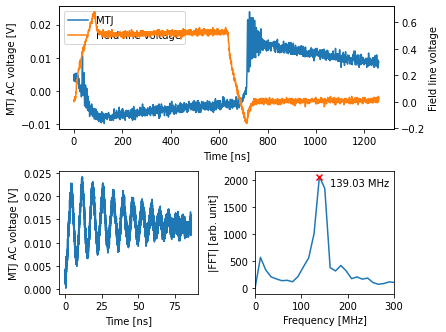

In [60]:
plot_relax("../Lab/Grainform/Relax2/800nm-P7.Wfm.csv", [11330000,12700000], point_jump=10_000)

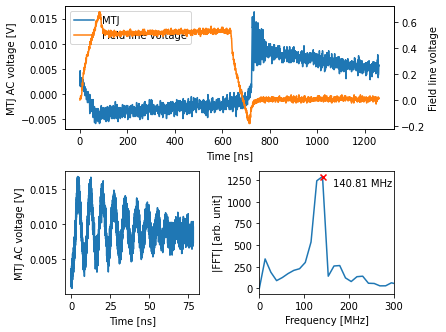

In [68]:
plot_relax("../Lab/Grainform/Relax2/800nm-P7-2.Wfm.csv", [11460000,12700000], point_jump=10_000)

# Simulation - Translation of the vortex

176.97013082431806


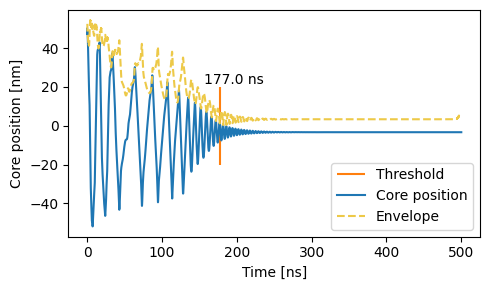

251.28028082670005


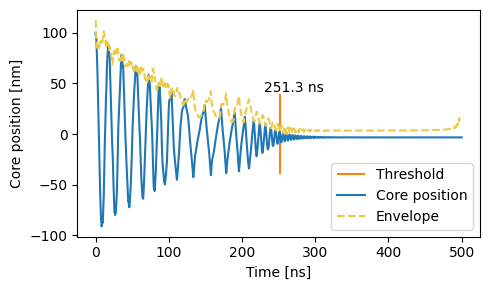

302.9301460622894


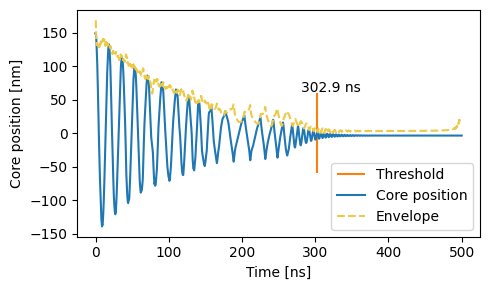

336.870272290284


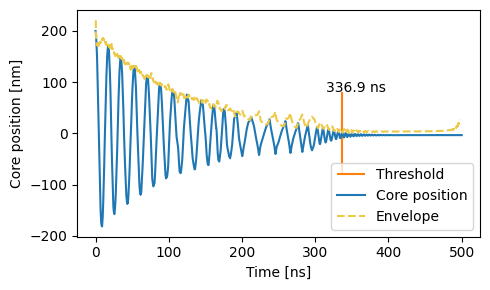

369.51025083626786


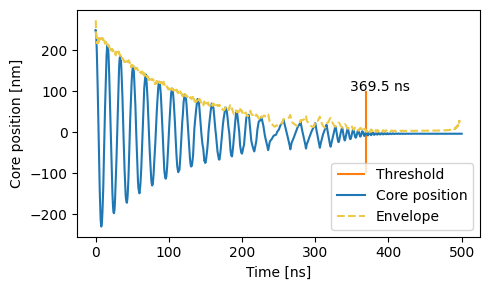

386.71016198339527


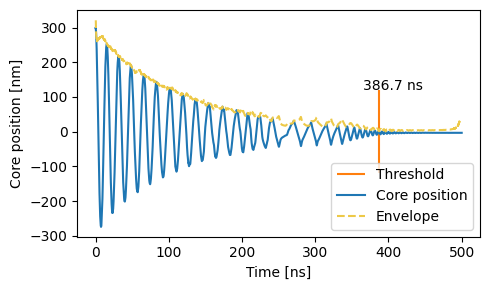

399.53003717018964


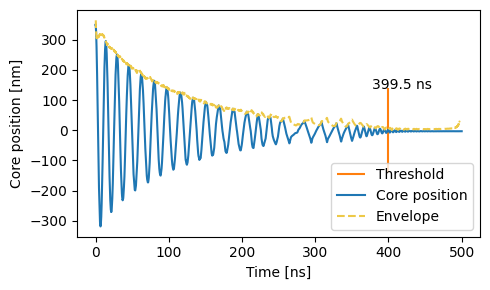

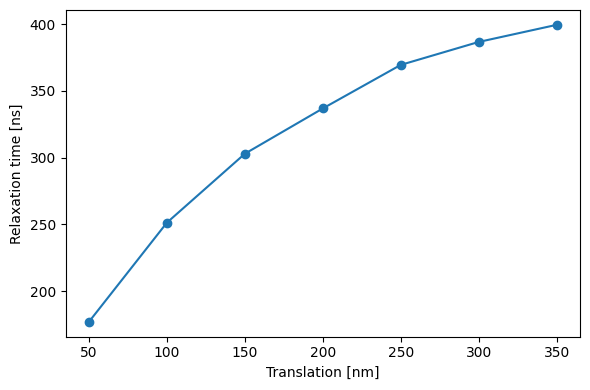

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

path = "../Simulations/Relax_trans/"
os.listdir(path)

files = []
for f in os.listdir(path):
    if ".out" in f:
        files.append(f)
le = files.pop()
files.insert(0,le)

threses = []

for f in files:
    #print(f)
    df = pd.read_table(path + f"{f}" + "/table.txt")
    #print(df)
    t = df.loc[:,"# t (s)"].to_numpy()
    my = df.loc[:,"my ()"].to_numpy()
    bext = df.loc[:,"B_extx (T)"].to_numpy()
    core_pos_x = df.loc[:,"ext_coreposx (m)"].to_numpy()
    
    envelope = np.abs(hilbert(core_pos_x))
    thres = (t[np.where(np.abs(envelope) < 2e-9)][0])
    print(f"{thres*1e9}")
    threses.append(thres*1e9)
    
    plt.figure(figsize=(5,3))
    plt.vlines(thres*1e9, np.max(core_pos_x*1e9)*0.4,-np.max(core_pos_x*1e9)*0.4, colors="tab:orange", label="Threshold")
    plt.plot(t*1e9,core_pos_x*1e9, label="Core position", color="tab:blue")
    plt.plot(t[30:-300]*1e9,envelope[30:-300]*1e9, color="#edc948", ls = "--", label="Envelope")
    plt.xlabel("Time [ns]")
    plt.ylabel("Core position [nm]")
    plt.annotate(f"{thres*1e9:.1f} ns", (thres*1e9, 0), textcoords="offset points", xytext=(10,30), ha='center')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"../Dropbox/Apps/Overleaf/Speciale/Chapter3_simulation/fig/core_translation_relax/{f}.pdf")
    plt.show()

trans = np.array([50, 100, 150, 200, 250, 300, 350])
plt.figure(figsize=(6,4))
plt.plot(trans, threses, marker="o")
plt.xlabel("Translation [nm]")
plt.ylabel("Relaxation time [ns]")
plt.tight_layout()
plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter3_simulation/fig/core_translation_relax/summary.pdf")
plt.show()

In [1]:
import numpy as np

In [14]:
a = np.array(([3,0,0],[0,1,1],[0,1,1]))
d, v = np.linalg.eig(a)
d,v
v @ np.diag(np.array([2,0,3])) @ v.T
#v @ np.diag(d) @ v.T

array([[3., 0., 0.],
       [0., 1., 1.],
       [0., 1., 1.]])

In [49]:
(a - lambda I ) v = 0 

array([[ 1.,  0.,  0.],
       [ 0., -1.,  1.],
       [ 0.,  1., -1.]])

In [56]:
a - np.eye(3)*3

array([[ 0.,  0.,  0.],
       [ 0., -2.,  1.],
       [ 0.,  1., -2.]])